In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [5]:
data = np.load('models/MCA_GEP_MEDICUS_CellBlind_LUNG/results/mse_preds.npy')
print(data.shape)

(2, 12630)


In [6]:
predict = data[0]
label = data[1]
print(predict.shape)
print(label.shape)

(12630,)
(12630,)


In [7]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt
# 计算皮尔逊相关系数
p = pearsonr(predict,label)[0]
print('PCC: ',p)
# 计算R2
r2 = r2_score(label,predict)
print('R2: ',r2)
# 计算MSE和RMSE
mse = mean_squared_error(label,predict)
rmse = sqrt(mse)
print('MSE: ',mse)
print('RMSE: ',rmse)

PCC:  0.8890988376396393
R2:  0.7882936227393502
MSE:  1.6255511
RMSE:  1.2749710210611036


### 绘图

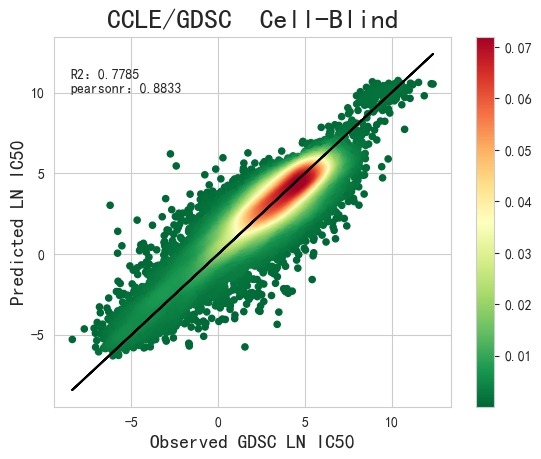

In [5]:
from scipy.stats import gaussian_kde
# Calculate the point density
xy = np.vstack([label,predict])  #  将两个维度的数据叠加
z = gaussian_kde(xy)(xy)  # 建立概率密度分布，并计算每个样本点的概率密度
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
y_label, predicted, z = label[idx], predict[idx], z[idx]
plt.plot(y_label, y_label, color = 'black', label = 'x=y')
plt.scatter(y_label,predicted,c=z, s=20,cmap='RdYlGn_r')
x = np.linspace(-8,8,50)
# plt.plot(x,x,color = 'b')
plt.colorbar()
plt.text(-8.5,10,'R2：{:>.4f}\npearsonr：{:>.4f}'.format(r2,p))
plt.title('CCLE/GDSC  Cell-Blind',fontsize = 20)
plt.xlabel('Observed GDSC LN IC50',fontsize=14)
plt.ylabel('Predicted LN IC50',fontsize=14)
plt.show()